In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x0_train, y0_train),(x0_test, y0_test) = mnist.load_data()

In [4]:
len(x0_train)

60000

In [5]:
x0_train[8787]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 246, 200,  39,
          9,   0,   0,   0,   0,   0,   0,   0,  28, 109, 128,   0,   0,
          0,   0],
       [  

In [6]:
y0_train[8787]

4

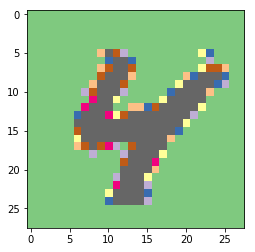

In [7]:
plt.imshow(x0_train[8787],cmap = "Accent")

In [8]:
x_train = x0_train.reshape(60000,28*28)

In [9]:
x0_train.shape#資料形狀

(60000, 28, 28)

In [10]:
x_train.shape

(60000, 784)

In [11]:
x_train[8787]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  84, 246, 200,  39,   9,   0,   0,
         0,   0,   0,   0,   0,  28, 109, 128,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 254, 25

In [12]:
x_test = x0_test.reshape(10000,28*28)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y0_train,10)#分類帽！！將它分成10種結果

In [15]:
y_test = np_utils.to_categorical(y0_test,10)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [17]:
model = Sequential()

In [18]:
model.add(Dense(output_dim = 500,input_dim=784))
model.add(Activation("sigmoid"))

In [19]:
model.add(Dense(output_dim = 500))
model.add(Activation("sigmoid"))

In [20]:
model.add(Dense(output_dim = 10))
model.add(Activation("softmax"))

In [21]:
model.compile(loss = "mse",optimizer=SGD(lr = 0.1),metrics = ["accuracy"])

In [22]:
model.fit(x_train,y_train,batch_size=200, nb_epoch=20)

Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.0872 - acc: 0.2638      

In [23]:
result = model.predict_classes(x_test)

 9792/10000 [============================>.] - ETA: 0s

神經網路判斷為： 5


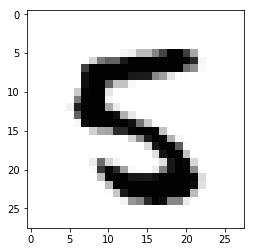

In [24]:
from ipywidgets import interact_manual
def identify(testnumber):
    plt.imshow(x0_test[testnumber], cmap = "Greys")
    print("神經網路判斷為：",result[testnumber])
interact_manual(identify, testnumber=(0,9999));

In [25]:
score = model.evaluate(x_test, y_test)
loss,acc = score
print(acc)

 9600/10000 [===========================>..] - ETA: 0s